# Sentiment Analysis with TextBlob

This notebook performs sentiment analysis
on cleaned LinkedIn posts using TextBlob.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Settings for displaying charts within the notebook
%matplotlib inline
plt.style.use("seaborn-v0_8") 
# Enhanced styling for the charts

In [34]:
import os

file_path = "../data/processed/youtube.csv"

try:
    df = pd.read_csv(file_path)
    print(f"Loaded {len(df)} rows from {file_path}")
    df.head()
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the path.")
except Exception as e:
    print(f"Error loading file: {e}")


Loaded 74 rows from ../data/processed/youtube.csv


In [ ]:
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    
    polarity = TextBlob(text).sentiment.polarity
    
    # Threshold for Neutral
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"


In [40]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



stop_words_en = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"[^a-zA-Zآ-ی\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words_en]
    return " ".join(words)


In [41]:
if "clean_content" in df.columns:
    df["sentiment"] = df["clean_content"].apply(get_sentiment)
    print(f"Sentiment analysis applied on {len(df)} rows.")
    df.head()
else:
    print("Column 'clean_content' not found in DataFrame.")


Column 'clean_content' not found in DataFrame.


Available columns: Index(['content', 'date', 'cleaned_content'], dtype='object')
Column 'clean_content' not found. Creating it now...
Column 'sentiment' not found. Creating it now...


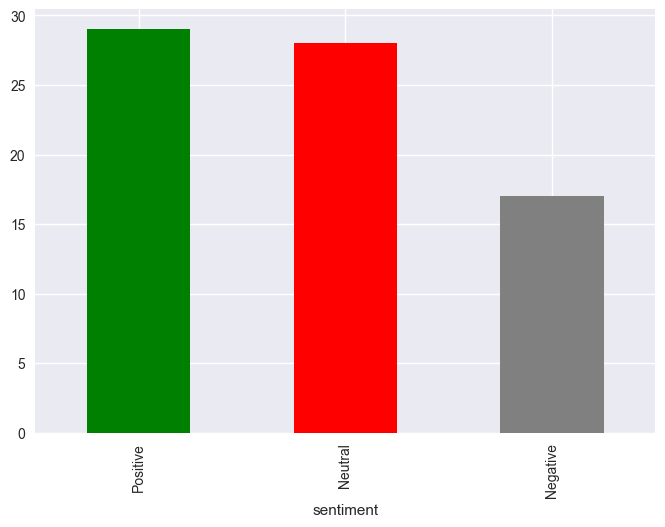

In [42]:
# Check columns
print("Available columns:", df.columns)

# Create clean_content if missing
if "clean_content" not in df.columns and "content" in df.columns:
    print("Column 'clean_content' not found. Creating it now...")
    df["clean_content"] = df["content"].apply(clean_text)

# Create sentiment if missing
if "sentiment" not in df.columns:
    print("Column 'sentiment' not found. Creating it now...")
    df["sentiment"] = df["clean_content"].apply(get_sentiment)

# Now plot
sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", color=["green","red","gray"])
plt.show()

plt.show()


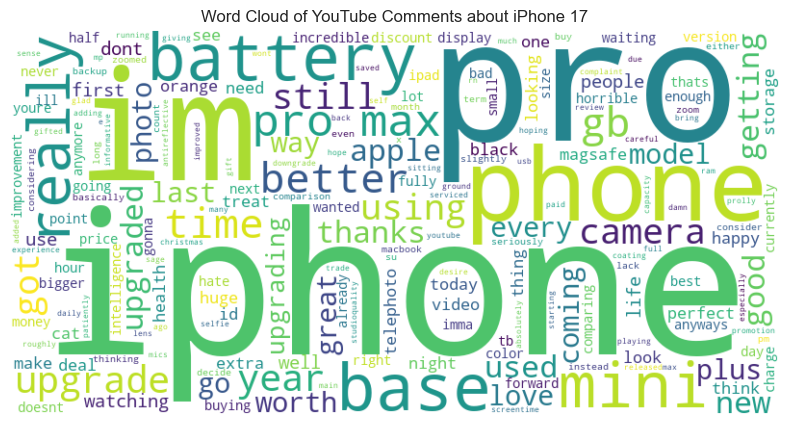

In [ ]:
from wordcloud import WordCloud

# Combining all the cleaned texts
all_text = " ".join(df["clean_content"].dropna())

# create Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of YouTube Comments about iPhone 17")
plt.show()


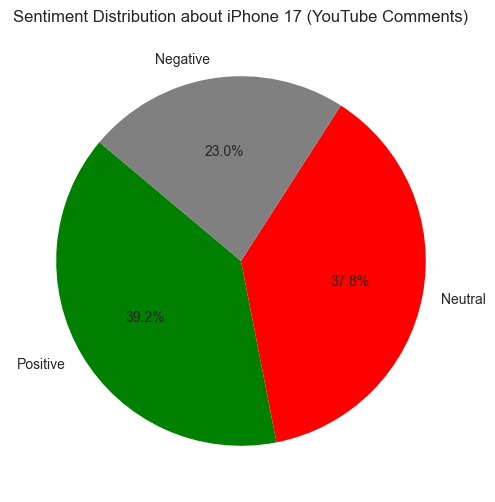

In [ ]:

# Counting the number of each sentiment label
sentiment_counts = df["sentiment"].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct="%1.1f%%", startangle=140,
        colors=["green","red","gray"])
plt.title("Sentiment Distribution about iPhone 17 (YouTube Comments)")
plt.show()


In [ ]:
# Counting the number of each sentiment label
sentiment_counts = df["sentiment"].value_counts()

# Calculating the percentages
sentiment_percent = df["sentiment"].value_counts(normalize=True) * 100

# Creating the final table
sentiment_stats = pd.DataFrame({
    "Count": sentiment_counts,
    "Percentage": sentiment_percent.round(2)
})

print(sentiment_stats)


           Count  Percentage
sentiment                   
Positive      29       39.19
Neutral       28       37.84
Negative      17       22.97


In [52]:
df.to_csv("../data/processed/youtube.csv", index=False)
